In [5]:
import pandas as pd
df = pd.read_csv("countries of the world.csv")
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [6]:
df = df.dropna()
df = df.iloc[:,2:].apply(lambda x: x.astype(str).str.replace(',','.').astype(float))

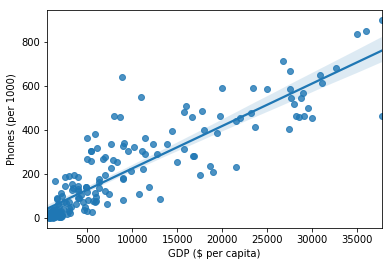

In [7]:
import seaborn as sns
sns.regplot(x='GDP ($ per capita)', y='Phones (per 1000)', data=df)

In [8]:
from scipy import stats
# 返回的结果是一个包含统计量w和p-值的元组。可以看到，p-值非常小，接近于0，于是可以拒绝原假设。我们认为各国人均GDP和手机使用率都不符合正态分布。
stats.shapiro(df['GDP ($ per capita)'])

(0.8052586317062378, 3.5005310282387736e-14)

In [9]:
stats.shapiro(df['Phones (per 1000)'])

(0.8678628206253052, 2.0484371143769664e-11)

In [10]:
df['GDP ($ per capita)'].corr(df['Phones (per 1000)'], method='pearson')

0.88352010541116666

In [11]:
df['GDP ($ per capita)'].corr(df['Phones (per 1000)'], method='spearman')

0.90412918508969042

In [12]:
df['GDP ($ per capita)'].corr(df['Phones (per 1000)'], method='kendall')

0.72385173233005073

In [13]:

stats.pearsonr(df['GDP ($ per capita)'], df['Phones (per 1000)'])

(0.88352010541116643, 3.3769381277913882e-60)

In [14]:
stats.spearmanr(df['GDP ($ per capita)'], df['Phones (per 1000)'])

SpearmanrResult(correlation=0.90412918508969042, pvalue=2.8375903612871671e-67)

In [15]:
stats.kendalltau(df['GDP ($ per capita)'], df['Phones (per 1000)'])

KendalltauResult(correlation=0.72385173233005073, pvalue=1.3086853817834578e-46)